In [33]:
import argparse
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [34]:
f = h5py.File("/home/localuser/Documents/M2/HPC/build/fields.h5", "r")
# for one time (I took the final instant below)
t = "10.0000000000"
g = f["t"][t]
Bx = g["Bx"][:]
By = g["By"][:]
Bz = g["Bz"][:]
Ex = g["Ex"][:]
Ey = g["Ey"][:]
Ez = g["Ez"][:]
Vx = g["Vx"][:]
Vy = g["Vy"][:]
Vz = g["Vz"][:]
N = g["N"][:]

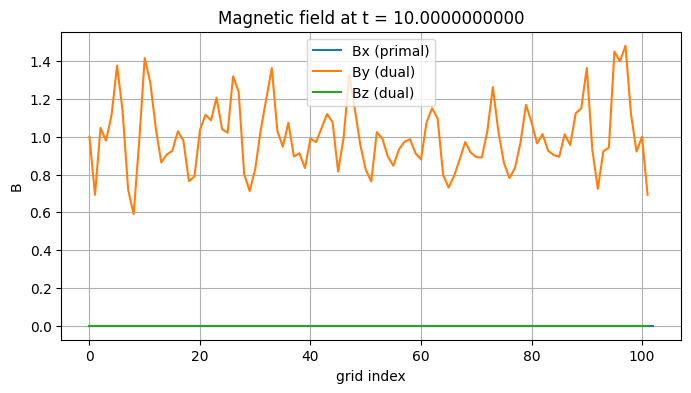

In [35]:
plt.figure(figsize=(8,4))
plt.plot(Bx, label="Bx (primal)")
plt.plot(By, label="By (dual)")
plt.plot(Bz, label="Bz (dual)")
plt.xlabel("grid index")
plt.ylabel("B")
plt.title(f"Magnetic field at t = {t}")
plt.legend()
plt.grid()
plt.savefig(f"Magnetic field at t = {t}.png", dpi=300)
plt.show()


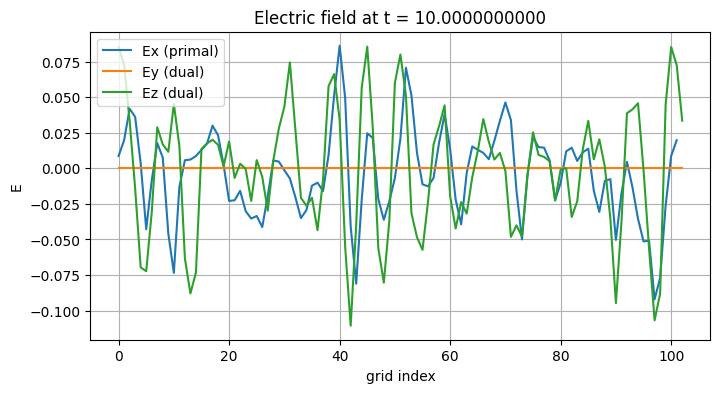

In [36]:
plt.figure(figsize=(8,4))
plt.plot(Ex, label="Ex (primal)")
plt.plot(Ey, label="Ey (dual)")
plt.plot(Ez, label="Ez (dual)")
plt.xlabel("grid index")
plt.ylabel("E")
plt.title(f"Electric field at t = {t}")
plt.legend()
plt.grid()
plt.savefig(f"Electric field at t = {t}.png", dpi=300)
plt.show()


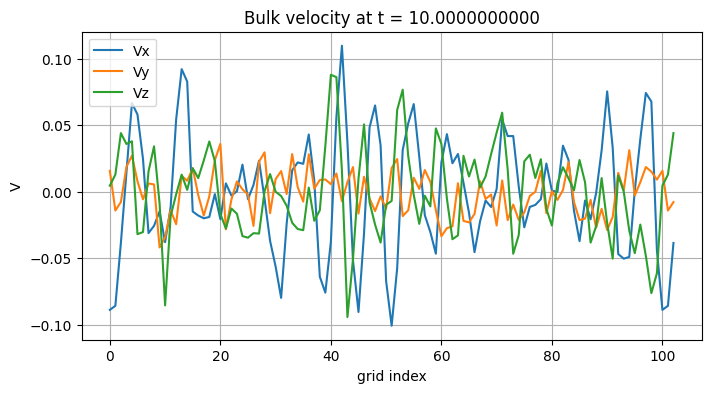

In [37]:
plt.figure(figsize=(8,4))
plt.plot(Vx, label="Vx")
plt.plot(Vy, label="Vy")
plt.plot(Vz, label="Vz")
plt.xlabel("grid index")
plt.ylabel("V")
plt.title(f"Bulk velocity at t = {t}")
plt.legend()
plt.grid()
plt.savefig(f"Bulk velocity at t = {t}.png", dpi=300)
plt.show()


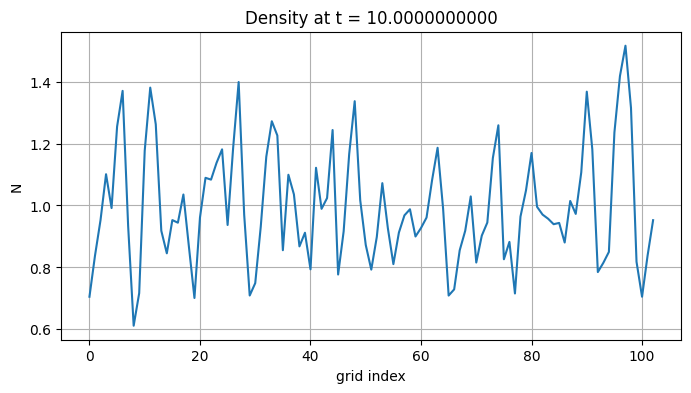

In [38]:
plt.figure(figsize=(8,4))
plt.plot(N)
plt.xlabel("grid index")
plt.ylabel("N")
plt.title(f"Density at t = {t}")
plt.grid()
plt.savefig(f"Density at t = {t}.png", dpi=300)
plt.show()


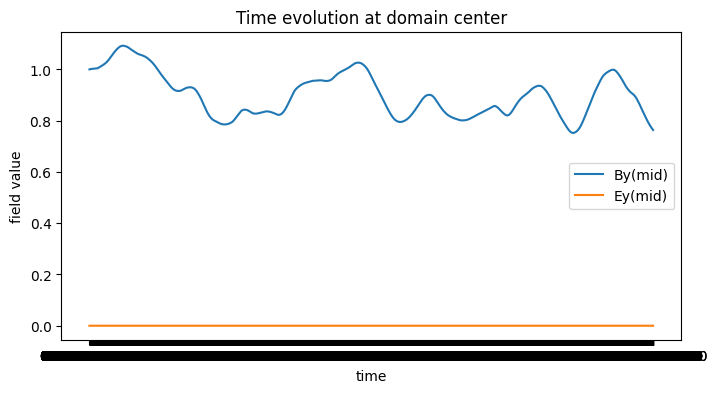

In [39]:
times = sorted(f["t"].keys(), key=float)
By_mid = []
Ey_mid = []
for tk in times:
 g = f["t"][tk]
 By_mid.append(g["By"][len(g["By"])//2])
 Ey_mid.append(g["Ey"][len(g["Ey"])//2])

plt.figure(figsize=(8,4))
plt.plot(times, By_mid, label="By(mid)")
plt.plot(times, Ey_mid, label="Ey(mid)")
plt.xlabel("time")
plt.ylabel("field value")
plt.title("Time evolution at domain center")
plt.legend()
#plt.grid()
plt.savefig("Time_evolution_at_domain_center.png", dpi=300)
plt.show()


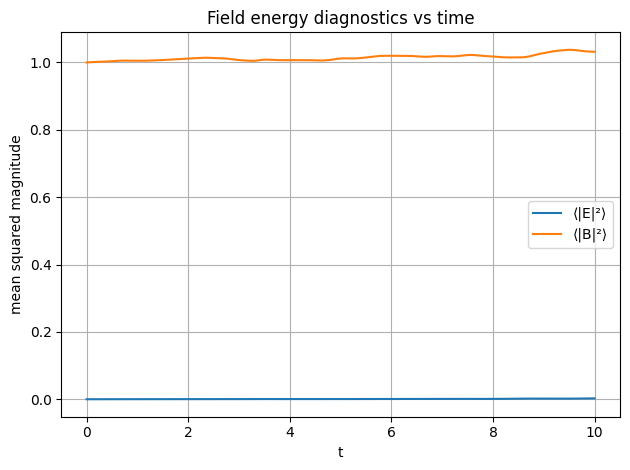

In [40]:
fname = "/home/localuser/Documents/M2/HPC/build/fields.h5"

def get_time_group(f):
    return f["t"] if "t" in f else f

with h5py.File(fname, "r") as f:
    tgrp = get_time_group(f)
    times = sorted(tgrp.keys(), key=float)

    tvals = []
    Emag = []
    Bmag = []
    for tk in times:
        g = tgrp[tk]
        Ex,Ey,Ez = g["Ex"][:], g["Ey"][:], g["Ez"][:]
        Bx,By,Bz = g["Bx"][:], g["By"][:], g["Bz"][:]
        # mean magnitude^2 (cheap diagnostic)
        Emag.append(np.mean(Ex*Ex) + np.mean(Ey*Ey) + np.mean(Ez*Ez))
        Bmag.append(np.mean(Bx*Bx) + np.mean(By*By) + np.mean(Bz*Bz))
        tvals.append(float(tk))

plt.figure()
plt.plot(tvals, Emag, label="⟨|E|²⟩")
plt.plot(tvals, Bmag, label="⟨|B|²⟩")
plt.xlabel("t")
plt.ylabel("mean squared magnitude")
plt.title("Field energy diagnostics vs time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("Field_Energy_evolution.png", dpi=300)
plt.show()


## COMMENTS

Note that fields are defined on staggered (primal/dual) grids, hence components are plotted against
their respective grid indices rather than a single common spatial coordinate.

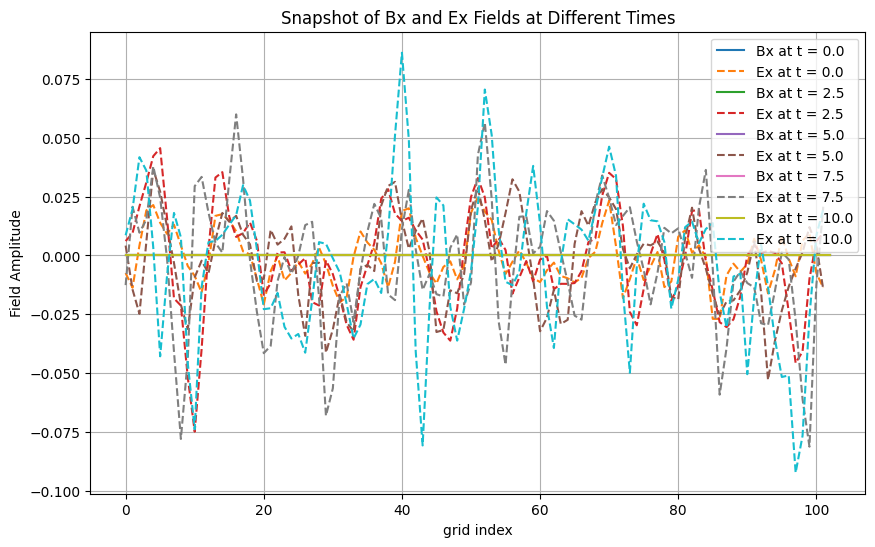

In [41]:

with h5py.File(fname, "r") as f:
    time_steps = sorted(list(f['t'].keys()))
    
    if not time_steps:
        print("Error: No time steps found in the file.")
    else:

        fig, ax = plt.subplots(figsize=(10, 6))

        # How many steps to skip between plots, freely adjustable
        plot_every_n_steps = 2500

        for i, t in enumerate(time_steps):
            if i % plot_every_n_steps == 0:
                bx_data = f['t'][t]['Bx'][:]
                ex_data = f['t'][t]['Ex'][:]
                
                ax.plot(bx_data, label=f'Bx at t = {float(t):.1f}')
                ax.plot(ex_data, label=f'Ex at t = {float(t):.1f}', linestyle='--')

        ax.set_title("Snapshot of Bx and Ex Fields at Different Times")

        ax.set_ylabel("Field Amplitude")
        ax.set_xlabel("grid index")
        ax.legend()
        ax.grid(True)
        
        plt.savefig("Bx_Ex_evolution.png", dpi=300)
        plt.show()
